# Predictive Advertising Analysis 

**Disclosure: I will be working with a fake data set**

Objective: Create a model capable of predicting whether or not a user will click on a given ad provided the users public profile info and metadata.  

This data set "advertising.csv" contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad


In [54]:
#Import Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
sns.set_style('darkgrid')
sns.set(color_codes = True)
%matplotlib inline 

### Load in data 

In [55]:
ad_df = pd.read_csv('advertising.csv') #Read into dataframe 

ad_df.head() #Check the head


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [56]:
#At a glance
ad_df.info() 
ad_df.describe() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis 
 
How does Age compare to Area Income? 

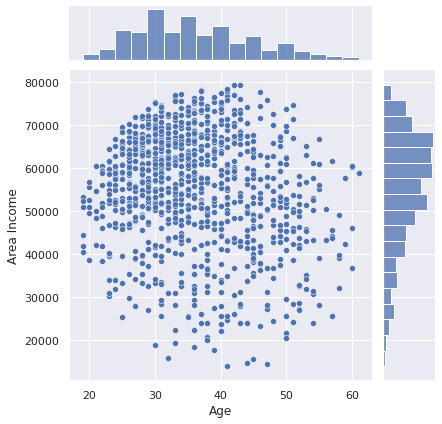

In [57]:
sns.jointplot(x='Age',y='Area Income',data=ad_df)

Now examine the kde distributions of Daily Time Spent Spent on Site and  Age.

array([[ 1.        , -0.33151334],
       [-0.33151334,  1.        ]])

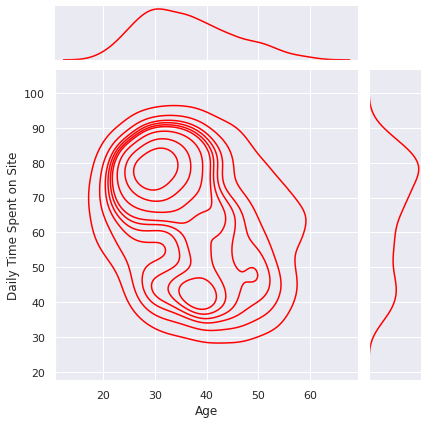

In [58]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_df,color='red', kind='kde')
np.corrcoef(ad_df['Age'], ad_df['Daily Time Spent on Site']) #Calculate pearsonr value \

#pearsonr = -0.33

"Daily Time Spent on Site" vs. "Dailt Internet Usage" 

array([[1.        , 0.51865848],
       [0.51865848, 1.        ]])

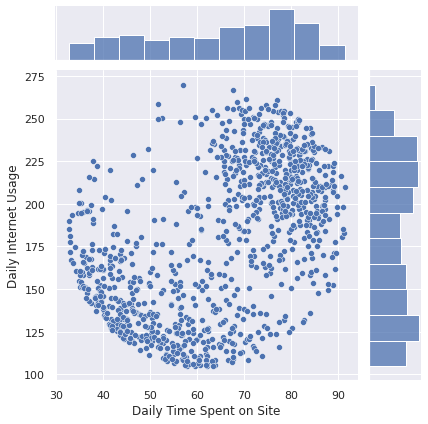

In [ ]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage', data=ad_df)
np.corrcoef(ad_df['Daily Time Spent on Site'], ad_df['Daily Internet Usage'])

Pairplot with hue defined by the 'Clicked on Ad' column feature.  

In [ ]:
sns.pairplot(ad_df, hue='Clicked on Ad', palette='bwr')

## Logistic Regression
Split the data into training and testing sets. 

In [ ]:
#Import
from sklearn.model_selection import train_test_split
#Define train and test sets
X = ad_df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = ad_df['Clicked on Ad']
#Time to split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Train and fit a logistic regression model with the training set. 

In [ ]:
#Import 
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

## Predicitons and Evaluations
Create a classification report of the model with test data

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
#import 
from sklearn.metrics import classification_report

In [ ]:
#Use print() for cleaner output 
print(classification_report (y_test, predictions)) 

### Thank you for reading!  